# AcadGild_DataScience_ML_Assignment_25

<b> Objective </b> To predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost algorithm.

In [ ]:
#Solution

<b> Loading Python modules </b>

In [2]:
# matplotlib inline :to refrelect plots and graphics on jupyter notbooks itself
%matplotlib inline 
import pandas as pd # for Data analysis using pandas
import numpy as np # for numerical opeartions using numpy
import matplotlib.pyplot as plt # for graphical representation of data using matplotlib
import seaborn as sns  # for graphical representation of data using Seaborn


In [3]:
# Load python modules for machine learning algorithm
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import train_test_split
from xgboost import plot_tree , plot_importance 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score, recall_score , f1_score

<b> Loading Dataset </b>

In [4]:
# Laod data set from UCL machine learning dataset using pandas dataframe
df_AdultData_train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
df_AdultData_test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [5]:
# Apply columns name into dataframe
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
df_AdultData_train_set.columns=col_labels
df_AdultData_test_set.columns=col_labels

In [6]:
# Sample rows of training data
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
# Sample rows of training data
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


<b> Listing of attributes:</b>
* <b>wage_class</b> : >50K, <=50K.
* <b>age</b>: continuous.
* <b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.
* <b>fnlwgt</b>: continuous.
* <b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* <b>education-num</b>: continuous.
* <b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,Married-spouse-absent, Married-AF-spouse.
* <b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Profspecialty,Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* <b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* <b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* <b>sex</b>: Female, Male.
* <b>capital-gain</b>: continuous.
* <b>capital-loss</b>: continuous.
* <b>hours-per-week</b>: continuous.
* <b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,Holand-Netherlands.

<b> Statistical and Descriptive Analysis of Training and Test Datasset </b>

In [8]:
# get null/na records in data

# function to get na values in dataset
def get_NA_values(df):
    ''' This function will return sum of NA values in dataset'''
    sum_na =df.isna().sum().sum()
    return sum_na
    
print("NULL/NA values in training dataset :",get_NA_values(df_AdultData_train_set))
print("NULL/NA values in test dataset :",get_NA_values(df_AdultData_test_set))

NULL/NA values in training dataset : 0
NULL/NA values in test dataset : 0


In [9]:
# get shape of dataset

# function to get shape of dataset
def get_shape_of_dataset(df):
    '''This function will return shape(structure) of dataset'''
    shape_data="No. Of rows in dataset : {0} & No. Of columns in dataset : {1}" .format(df.shape[0] , df.shape[1])
    return shape_data
                                                                                       
print("For Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("For Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))
                                                                                                                                                

For Training dataset
 No. Of rows in dataset : 32561 & No. Of columns in dataset : 15
For Test dataset
 No. Of rows in dataset : 16281 & No. Of columns in dataset : 15


In [10]:
# get Datatype and column information of dataset

# function to datatype and column information of dataset
def get_info_of_data(df):
    '''This function will return data type and column information about dataset '''
    info=df.info()
    return info

print("Datatype and column information about Training data \n")
print(get_info_of_data(df_AdultData_train_set),"\n")
print("Datatype and column information about Test data \n")
print(get_info_of_data(df_AdultData_test_set))


Datatype and column information about Training data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 

Datatype and column information about Test data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non

In [11]:
# get Stattistical distribution of dataset

# describe() : function , by default return numerical stats about data

pd.options.display.float_format = "{:.3f}".format # prnt values till 3 decimal places

#function to get Stattistical distribution of dataset
def get_stats_of_data(df):
    '''This frunction will return statistical ananlysis of dataset'''
    stats= df.describe()
    return stats

print("Statistical analysis of training data")
get_stats_of_data(df_AdultData_train_set)

Statistical analysis of training data


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [12]:
print("Statistical analysis of test data")
get_stats_of_data(df_AdultData_test_set)

Statistical analysis of test data


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000,16281.000,16281.000,16281.000,16281.000,16281.000
mean,38.767,189435.678,10.073,1081.905,87.899,40.392
std,13.849,105714.908,2.568,7583.936,403.105,12.479
min,17.000,13492.000,1.000,0.000,0.000,1.000
25%,28.000,116736.000,9.000,0.000,0.000,40.000
50%,37.000,177831.000,10.000,0.000,0.000,40.000
75%,48.000,238384.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,3770.000,99.000


In [13]:
# Descriptive Stats about  String type data
def get_stats_of_string_type_data(df):
    '''This function will return statistics for Object type data '''
    descriptive_stats=df.describe(include=[np.object]) # np.object for object type data
    return descriptive_stats

print("Descriptive statistical analysis of training data")
get_stats_of_string_type_data(df_AdultData_train_set)

Descriptive statistical analysis of training data


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
print("Descriptive statistical analysis of test data")
get_stats_of_string_type_data(df_AdultData_test_set)

Descriptive statistical analysis of test data


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [15]:
# trim white space from dataframe cells

def trim_whiteSpace(df):
    '''This function will trim white space from dataframe'''
    df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  
    return df

# trim white space into training and test dataset
df_AdultData_test_set = trim_whiteSpace(df_AdultData_test_set)
df_AdultData_train_set = trim_whiteSpace(df_AdultData_train_set)

In [16]:
# Check duplicate data in Dataset

def check_duplictes_value_in_data(df):
    '''This function will return count of duplicate value if exist in dataset'''  
    is_duplicate=df.duplicated().any()
    dupluicate_count=df.duplicated().sum()
    return is_duplicate , dupluicate_count

print("In Training dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_train_set)[0] ,check_duplictes_value_in_data(df_AdultData_train_set)[1] ))
print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_test_set)[0] ,check_duplictes_value_in_data(df_AdultData_test_set)[1] ))


In Training dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:24
In Test dataset
 Is dataset having duplicate values :True , Total duplicates values in dataset:5


In [17]:
#remove duplicate data
def remove_duplicate_in_dataset(df):
    ''' This function will remove duplicate data from datatset'''
    df=df.drop_duplicates(keep='first')
    return df

# Remove duplicate values from dataset
df_AdultData_train_set=remove_duplicate_in_dataset(df_AdultData_train_set)
df_AdultData_test_set=remove_duplicate_in_dataset(df_AdultData_test_set)



print("In Training dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_train_set)[0] ,check_duplictes_value_in_data(df_AdultData_train_set)[1] ))
print("In Test dataset\n Is dataset having duplicate values :{0} , Total duplicates values in dataset:{1}".format(check_duplictes_value_in_data(df_AdultData_test_set)[0] ,check_duplictes_value_in_data(df_AdultData_test_set)[1] ),"\n")
# Checck for structure of data after duplicate rows removal
print("For Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("For Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))

In Training dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0
In Test dataset
 Is dataset having duplicate values :False , Total duplicates values in dataset:0 

For Training dataset
 No. Of rows in dataset : 32537 & No. Of columns in dataset : 15
For Test dataset
 No. Of rows in dataset : 16276 & No. Of columns in dataset : 15


In [18]:
# Function to Get unique values of string(object) type data

def get_unique_values_for_stringtype_Data(df):
    '''this functionm will dispaly string /categorical type data from dataset'''
    for col in df.select_dtypes(include=[np.object]).columns:
        print(col , " :" , df[col].unique(),"\n")
        
print("The unique values in Training dataset is:")
get_unique_values_for_stringtype_Data(df_AdultData_train_set)
    

The unique values in Training dataset is:
workclass  : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation  : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship  : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race  : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' 'Cuba' 'Jam

In [19]:
print("The unique values in Training dataset is:")
get_unique_values_for_stringtype_Data(df_AdultData_test_set)

The unique values in Training dataset is:
workclass  : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education  : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital_status  : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation  : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship  : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race  : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex  : ['Male' 'Female'] 

native_country  : ['United-States' '?' 'Peru' 

As , we can see that both and train & test dataset containes some values with " ?". Which can cause error in prediction for wage earned by people mentioned in dataset.Thus it need to be remove.

In [20]:
# drop the rows which contains ? from data cells


def drop_unneeded_values(df):
    '''This function will remove unneeded (?) from dataset'''
    df=df.replace('?', np.nan).dropna()
    return df

# remove " ? " from dataset
df_AdultData_train_set= drop_unneeded_values(df_AdultData_train_set)
df_AdultData_test_set= drop_unneeded_values(df_AdultData_test_set)

# Shape of data after removal of "?"

print("For Training dataset\n",get_shape_of_dataset(df_AdultData_train_set))  
print("For Test dataset\n",get_shape_of_dataset(df_AdultData_test_set))

For Training dataset
 No. Of rows in dataset : 30139 & No. Of columns in dataset : 15
For Test dataset
 No. Of rows in dataset : 15055 & No. Of columns in dataset : 15


In [21]:
# Update wage class variable 
print("Wage class variable in Training Dataset :" ,df_AdultData_train_set['wage_class'].unique())
print("Wage class variable in Test Dataset :", df_AdultData_test_set['wage_class'].unique())

Wage class variable in Training Dataset : ['<=50K' '>50K']
Wage class variable in Test Dataset : ['<=50K.' '>50K.']


In [22]:
#Update wage_claas variable and replace  with older one
df_AdultData_test_set['wage_class']=df_AdultData_test_set['wage_class'].replace({'<=50K.': '<=50K', '>50K.':'>50K'})

In [23]:
#Sample rows fo training data
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [24]:
#Sample rows fo test data
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


As given , both train and test dataset contain categorical data , for analysis replace string data with number using pandas categorical() method.


In [25]:

# function to replace string (categorical) data with numeric value
def convert_to_Categorical(df):
    '''This function will return dataframe with replacing categorival data with numerical value'''
    for col in df.columns:
        if df[col].dtype=='object':
            df[col]=pd.Categorical(df[col]).codes
    return df

# Replacing string data with code(numerical) value
df_AdultData_test_set =convert_to_Categorical(df_AdultData_test_set)
df_AdultData_train_set =convert_to_Categorical(df_AdultData_train_set)


# Get info about data set afetr change
print("Datatype and column information about Training data after change\n")
print(get_info_of_data(df_AdultData_train_set),"\n")
print("Datatype and column information about Test data after change \n")
print(get_info_of_data(df_AdultData_test_set))


Datatype and column information about Training data after change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
age               30139 non-null int64
workclass         30139 non-null int8
fnlwgt            30139 non-null int64
education         30139 non-null int8
education_num     30139 non-null int64
marital_status    30139 non-null int8
occupation        30139 non-null int8
relationship      30139 non-null int8
race              30139 non-null int8
sex               30139 non-null int8
capital_gain      30139 non-null int64
capital_loss      30139 non-null int64
hours_per_week    30139 non-null int64
native_country    30139 non-null int8
wage_class        30139 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.9 MB
None 

Datatype and column information about Test data after change 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 0 to 16280
Data columns (total 15 columns):
age               15055

In [26]:
# Training data
df_AdultData_train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0


In [27]:
# Test data
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0


Basline Line accuracy with train and test data set for wage class

In [28]:
# Basline Line accuracy with train and test data set for wage class

# Where 0 : represents that slary is less than-equal to 50K and 1 : represent salary is grater than 50K
print("For training dataset")
df_AdultData_train_set['wage_class'].value_counts(normalize=True)

For training dataset


0   0.751
1   0.249
Name: wage_class, dtype: float64

In [29]:
print("For test dataset")
df_AdultData_test_set['wage_class'].value_counts(normalize=True)

For test dataset


0   0.754
1   0.246
Name: wage_class, dtype: float64

As we can see that , in both training and test dataset 75% people have salary less than -equal to 50K.

###### <b> Data Visualisation </b>

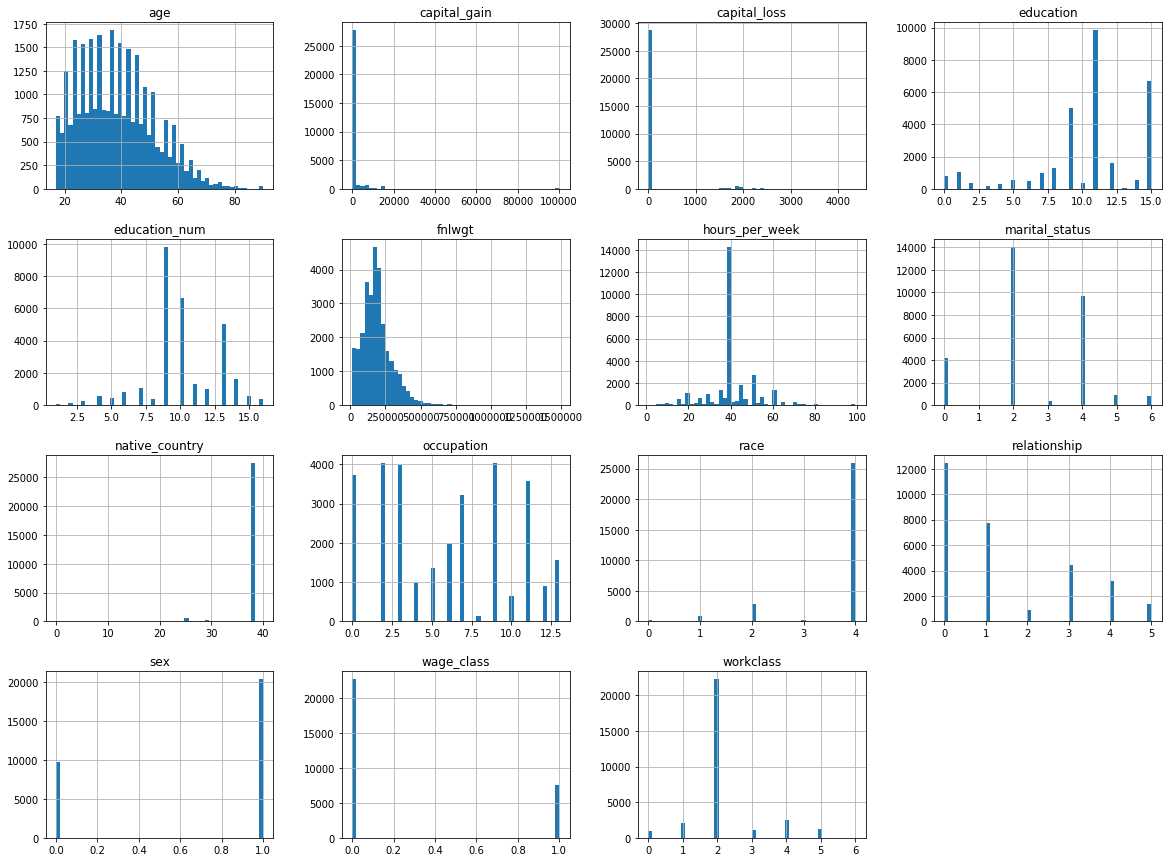

In [30]:
# Data Visualisation for Training Dataset for individual features
df_AdultData_train_set.hist(bins=50, figsize=(20,15))
plt.show()

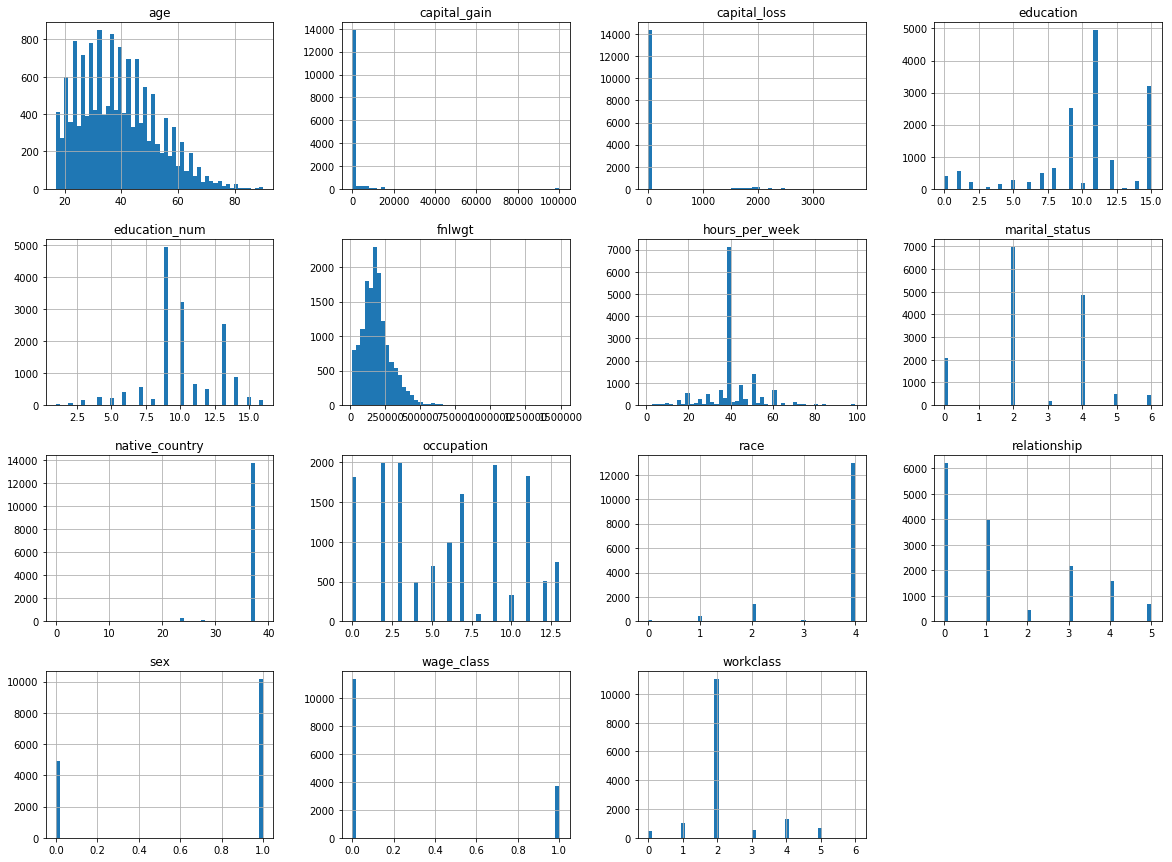

In [31]:
# Data Visualisation for Test Dataset for individual features
df_AdultData_test_set.hist(bins=50, figsize=(20,15))
plt.show()

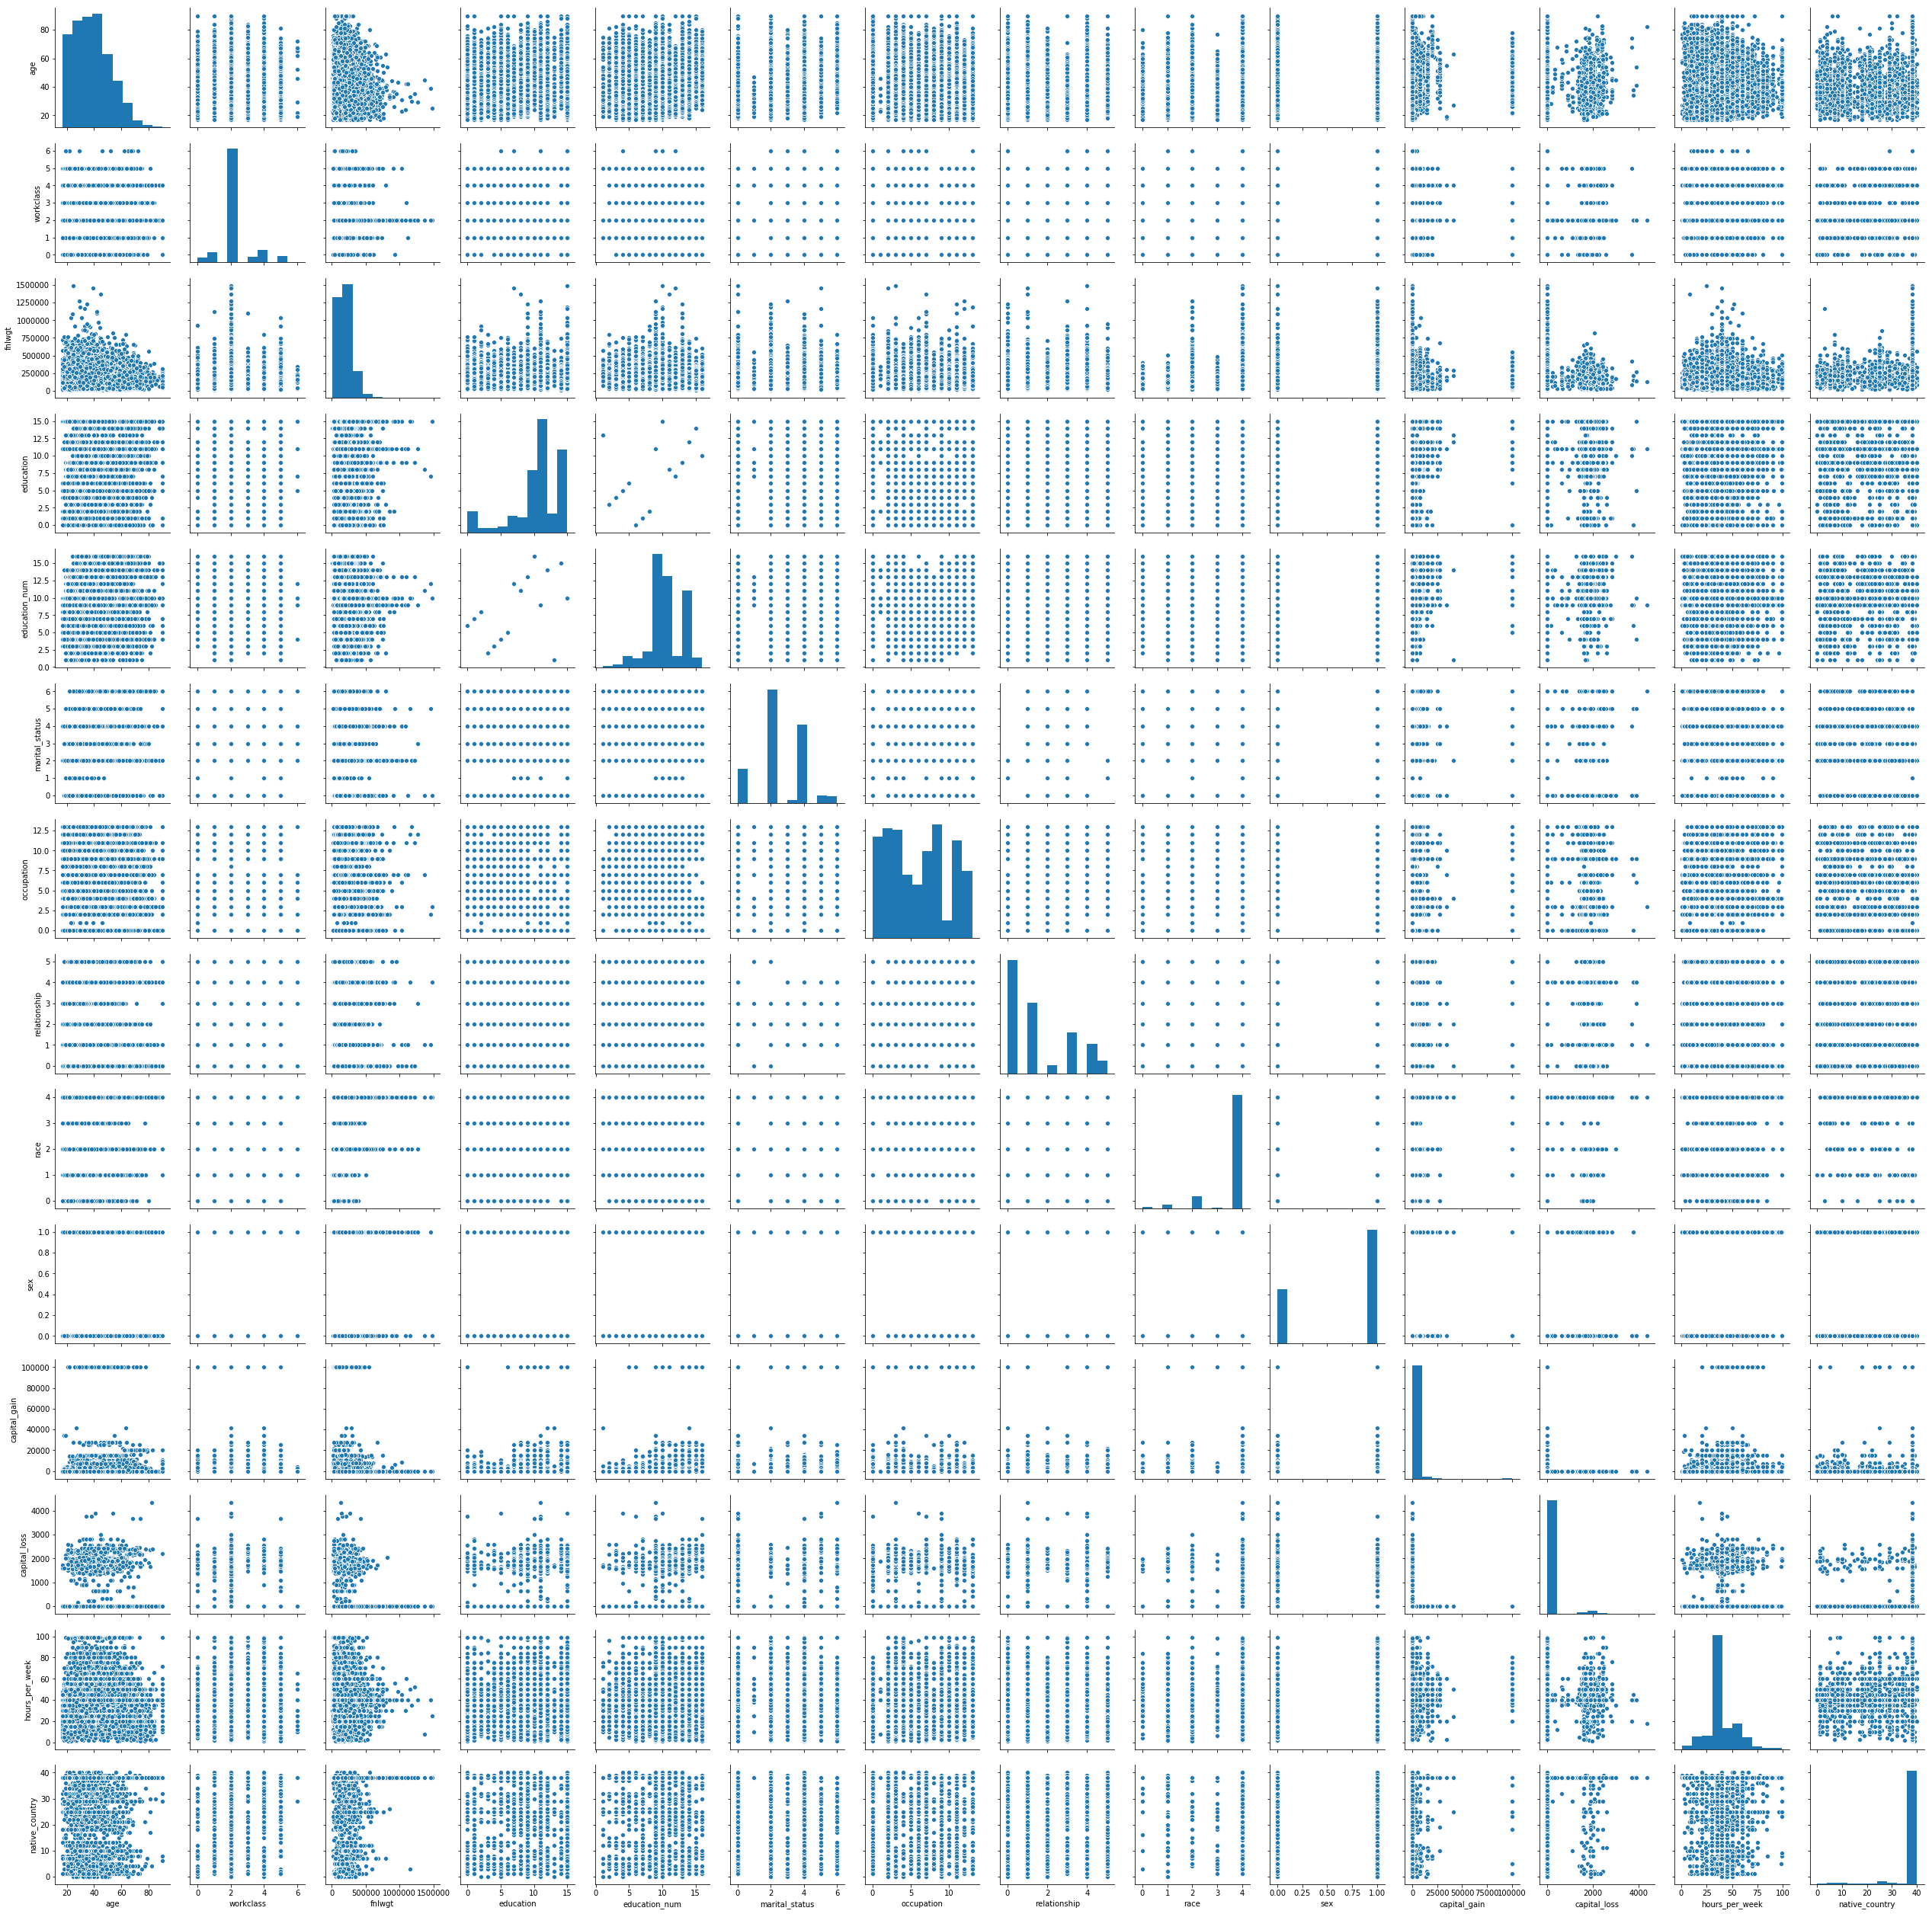

In [32]:
# Pair plot between features of dataset
sns.pairplot(df_AdultData_train_set.iloc[:,:-1])

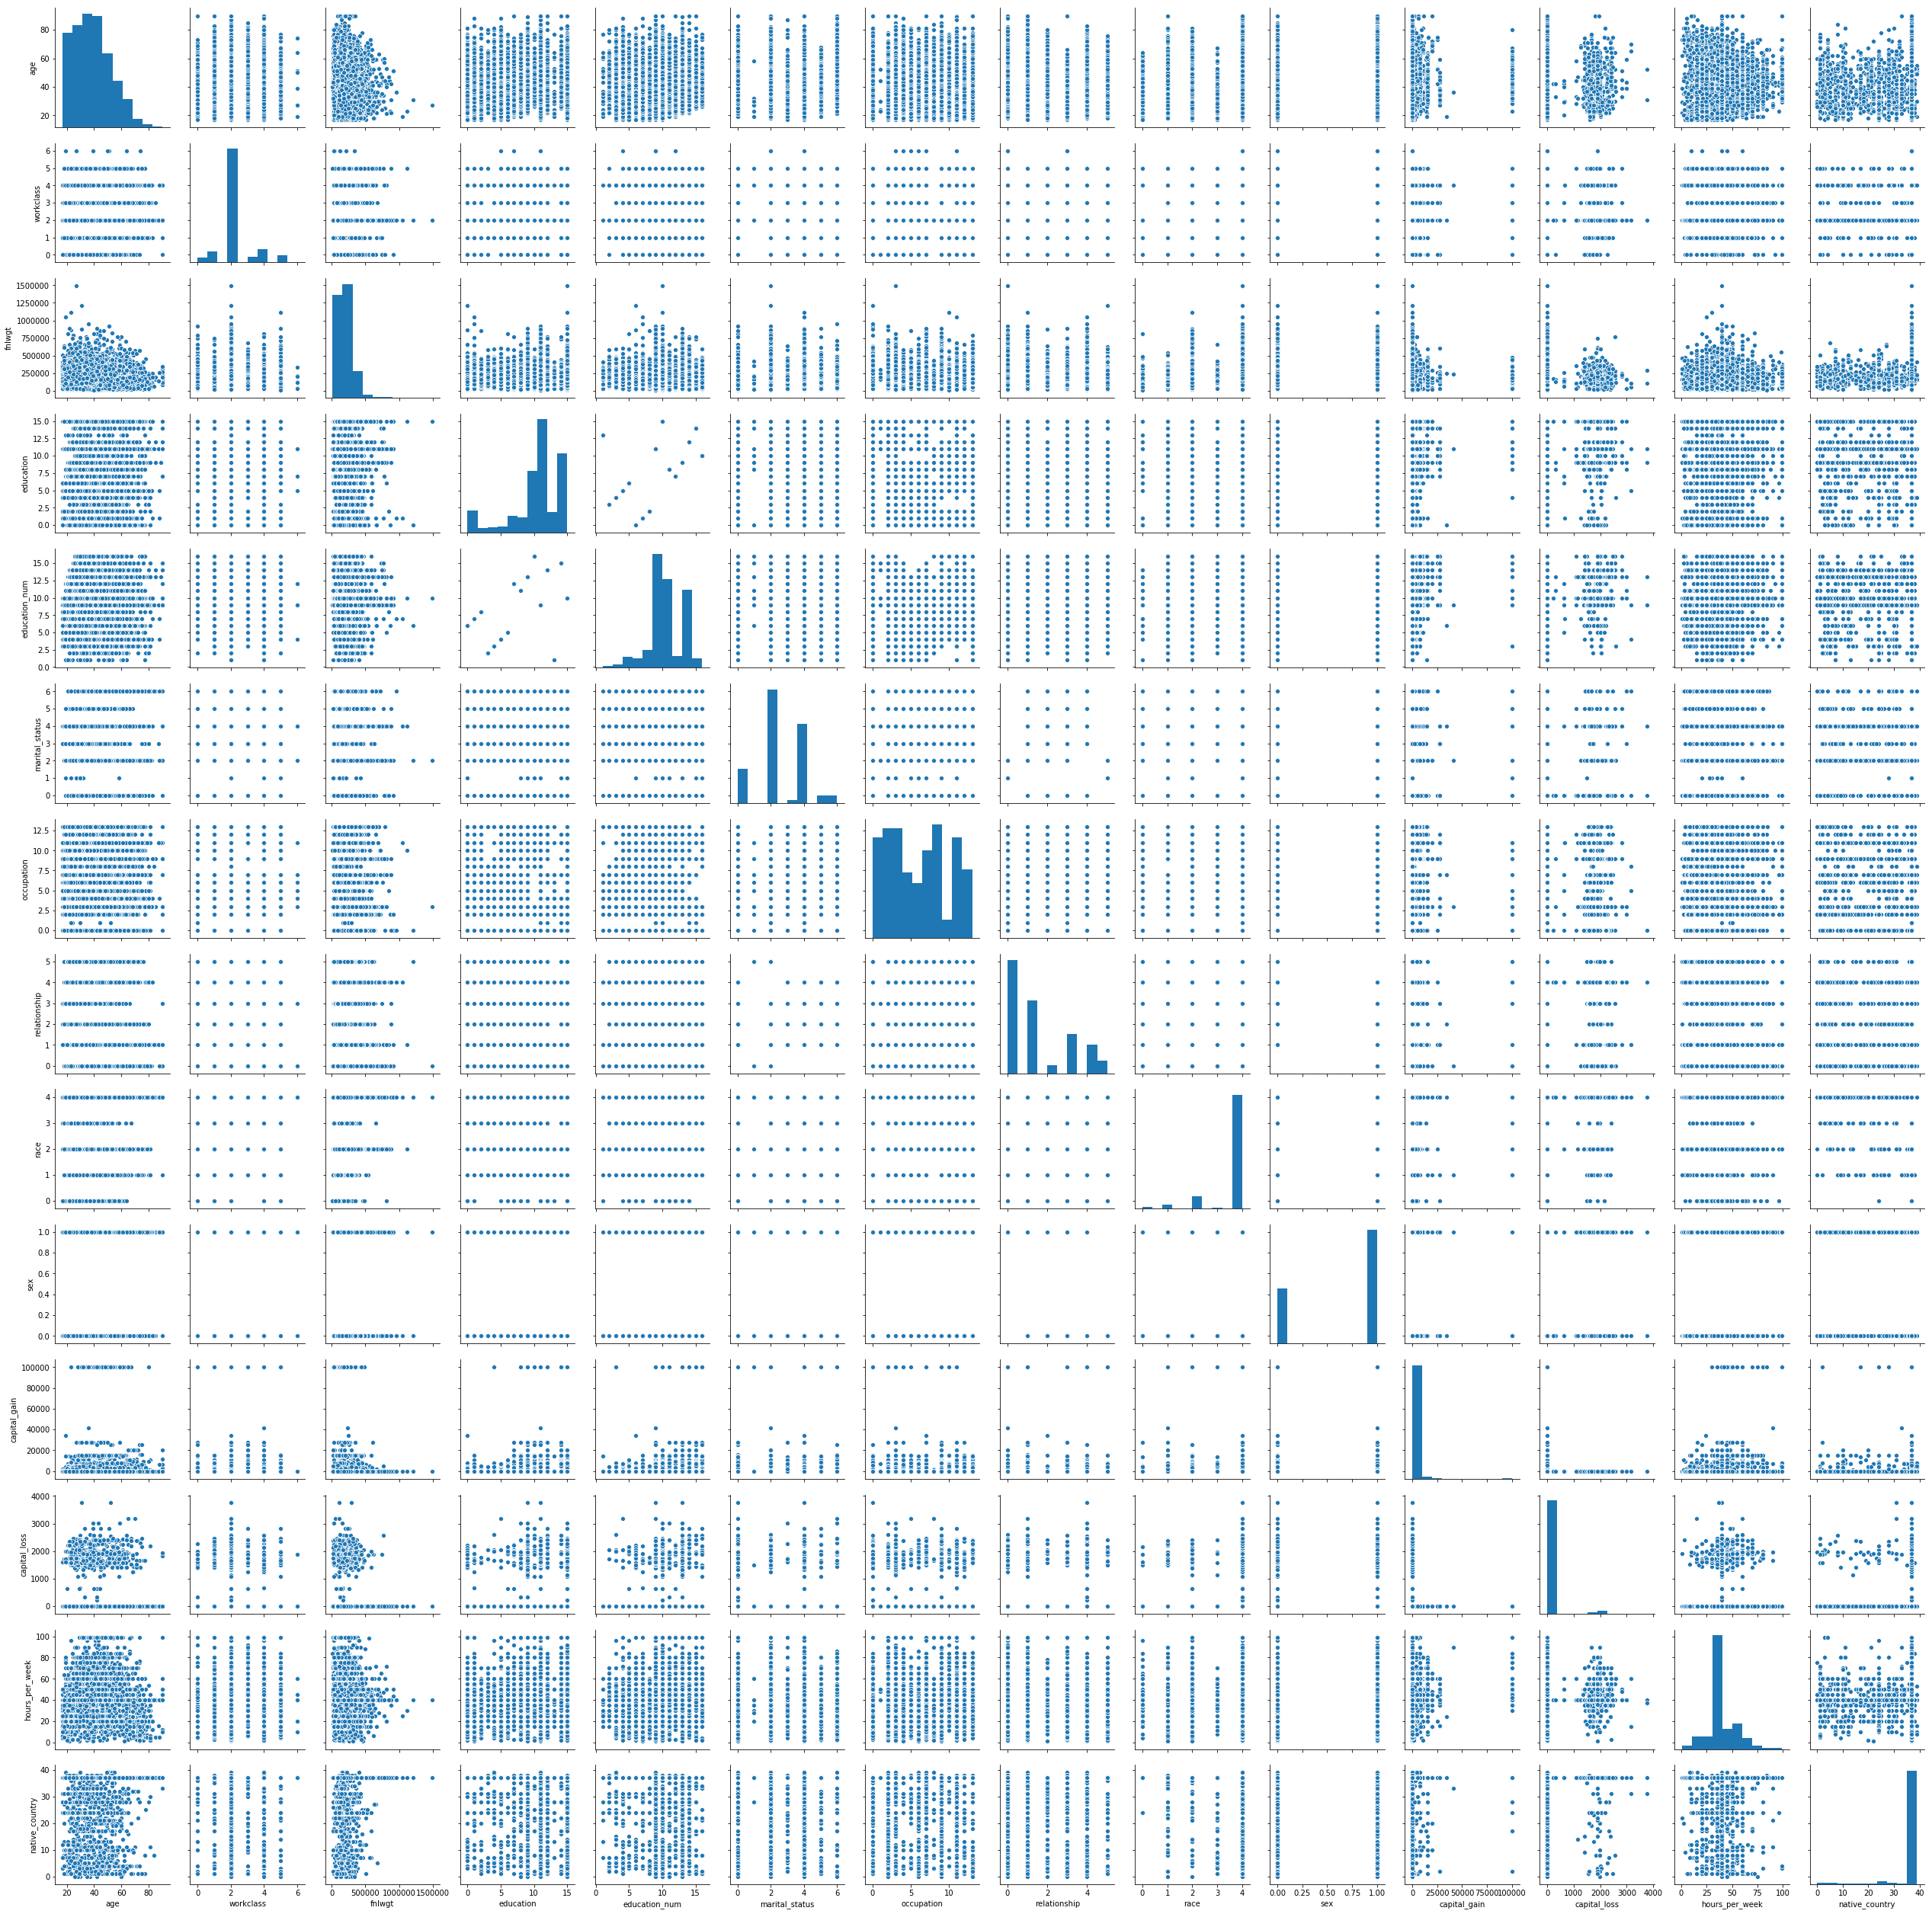

In [33]:
# Pair plot between features of test dataset
sns.pairplot(df_AdultData_test_set.iloc[:,:-1])

### <b> Data Preparation for XGboost machine learning model </b>

Select feature & target variable from Training variable 

In [34]:
# Create Target and Feature variable from Training datatset
# Note : Before applying dataframe to function align target variable at last postion in dataset

def get_Feature_Target_variable(df):
    '''This function returns feature and target variable based upon provided by dataframe'''
    df_Feature=df_AdultData_train_set.iloc[:,:-1]
    df_Target=df_AdultData_train_set.iloc[:,-1:]
    return df_Feature, df_Target

df_Feature , df_Target =get_Feature_Target_variable(df_AdultData_train_set)

In [35]:
print("Feature variables from Training dataset")
df_Feature.head(2)

Feature variables from Training dataset


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38


In [36]:
print("Target variables from Training dataset")
df_Target.head(2)


Target variables from Training dataset


,wage_class
0,0
1,0


<b> Split the Target and Feature variable into Train and Test dataset </b>

In [37]:
# Function to create Train & Test set from training dataste for machine learning algorithm

def create_train_test_set(df):
    ''' This function will return Train and test variable provided dataset'''
    X_train,X_test , y_train, y_test = train_test_split(df_Feature, df_Target , test_size=0.3 , random_state=25, shuffle=True)
    return X_train,X_test , y_train, y_test

# Apply function into Training datatset

X_train,X_test , y_train, y_test =create_train_test_set(df_AdultData_train_set)

print("The Feature variables structure of train set :",X_train.shape)
print("The target variable structure of tarin set :",y_train.shape)
print("The Feature variables structure of Test set :",X_test.shape)
print("The target variables structure of Test set :",y_test.shape)


The Feature variables structure of train set : (21097, 14)
The target variable structure of tarin set : (21097, 1)
The Feature variables structure of Test set : (9042, 14)
The target variables structure of Test set : (9042, 1)


### Apply XGBoost Model

In [38]:
# Import XGboostClassifier from xgboost.sklearn

from xgboost.sklearn import XGBClassifier 

In [39]:
# Define parameter for XGBoost model
params = {'objective':'binary:logistic' , 'max_depth':7, 'learning_rate':1.0,'silent':True , 'booster':'gbtree',
         'n_estimators':400,  'random_state':15 ,'subsample':0.6,'gamma':0.9 , 'n_jobs':10}

In [40]:
# Funtion to apply XGBoost model


def XGBoost_Model(feature_variable, target_variable , params):
    '''This function return XGBoost model which has been fitted with Train variable returned by dataframe'''
    XGB_model_clf= XGBClassifier(**params)
    xgb_model =XGB_model_clf.fit(X=feature_variable, y=np.ravel(target_variable))
    return xgb_model



feature_variable = X_train
target_variable=y_train
params # paramters for XGBoost model
# Apply Feature, targte and params variable to XGboostmodel
xgboost_model = XGBoost_Model(X_train, y_train, params)
    

<b> Model Evaluation </b>

In [41]:
# predict probabilities and values for Target variable

def predict_target_variable_prob_values(feature_variable , model):
    '''This function will return predicted target variable and its predicted probablities'''
    y_pred=model.predict(feature_variable)
    y_pred_prob=model.predict_proba(feature_variable)
    return y_pred , y_pred_prob

# Apply function to get Predicted target variable and predicted targte variable probabilities

y_pred=predict_target_variable_prob_values(X_train, xgboost_model)

y_pred_train=y_pred[0]
y_pred_prob_train=y_pred[1]
print("Based upon training datset(df_AdultData_train_set) ")
print("Predicted target variable (first 5 values):",y_pred_train[0:5])
print("Predicted target variable probabilities (first 5 values):",y_pred_prob_train[0:5])

Based upon training datset(df_AdultData_train_set) 
Predicted target variable (first 5 values): [0 1 0 0 1]
Predicted target variable probabilities (first 5 values): [[9.9980521e-01 1.9481166e-04]
 [7.9257488e-03 9.9207425e-01]
 [9.4540286e-01 5.4597169e-02]
 [9.3410307e-01 6.5896928e-02]
 [6.6275597e-03 9.9337244e-01]]


In [42]:
#get Confusion matrix and Classification report based on actual and predicted target variable


def get_confusion_matrix(actual_target_variable,predicted_target_variable):
    '''This function will return Confusion matrix based upon actual and predicted target variable'''
    matrix = confusion_matrix(y_true=actual_target_variable , y_pred=predicted_target_variable)
    return matrix

def get_classification_report(actual_target_variable,predicted_target_variable):
    '''This function will return classification report based upon actual and predicted target variable'''
    report = classification_report(y_true=actual_target_variable , y_pred=predicted_target_variable)
    return report



# Apply function to get Confusion matix for train variable of training dataset
actual_target_variable= y_train
predicted_target_variable= y_pred_train

print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Confusion matrix for training set :
 [[15833     8]
 [   14  5242]] 

Classification report for training set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15841
           1       1.00      1.00      1.00      5256

   micro avg       1.00      1.00      1.00     21097
   macro avg       1.00      1.00      1.00     21097
weighted avg       1.00      1.00      1.00     21097



In [43]:
# Get precision , recall , acuuracy , and F1-score

def get_model_eavluation_scores(actual_target_variable,predicted_target_variable ):
    '''This function returns model acurracy score, precision score , recall score and F1-score'''
    acc_score= accuracy_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    prec_score=precision_score(y_true=actual_target_variable , y_pred=predicted_target_variable)
    recl_score= recall_score(y_true=actual_target_variable, y_pred=predicted_target_variable)
    f1score= f1_score(y_true= actual_target_variable, y_pred=predicted_target_variable)
    return acc_score , prec_score , recl_score , f1score

# assign values 

actual_target_variable=y_train
predicted_target_variable=y_pred_train

# Apply fucntion to get evaluation scores
eval_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("Model Accuracy score :", eval_scores[0] )
print("Model Precision score :", eval_scores[1] )
print("Model Recall score :", eval_scores[2] )
print("Model F-1 score :", eval_scores[3] )

Model Accuracy score : 0.9989571977058349
Model Precision score : 0.9984761904761905
Model Recall score : 0.9973363774733638
Model F-1 score : 0.9979059584999048


In [44]:
#Feature Importance based upon Xgboost model

# align feature importance return by model andfeatures
importance = pd.DataFrame.from_dict({'features':X_train.columns, 'importance': xgboost_model.feature_importances_})
importance=importance.sort_values(by='importance', ascending=False)
importance

,features,importance
2,fnlwgt,0.362
0,age,0.186
12,hours_per_week,0.094
6,occupation,0.094
3,education,0.062
4,education_num,0.052
1,workclass,0.043
7,relationship,0.031
5,marital_status,0.023
13,native_country,0.015


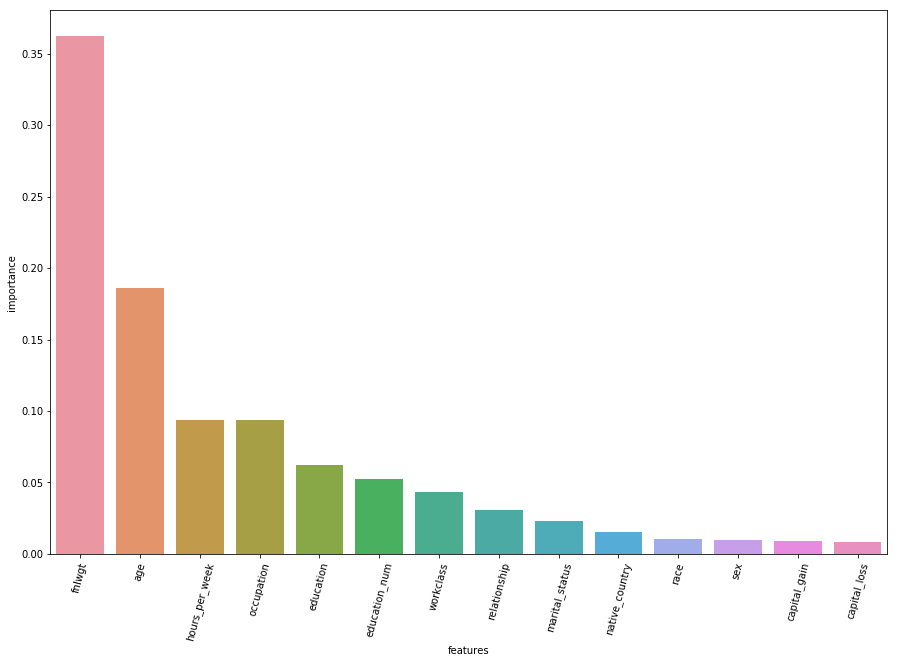

In [45]:
# Visualisation of feature importance
plt.figure(figsize=(15,10))
sns.barplot(importance.features, importance.importance)
plt.xticks(rotation=75)
plt.show()

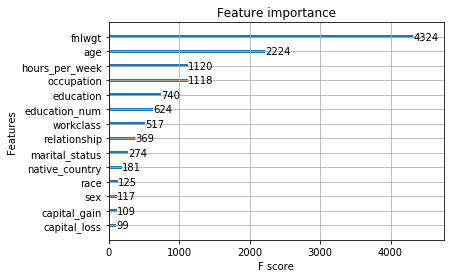

In [46]:
# Feature importance using Xgboost plot_importance
plot_importance(xgboost_model)

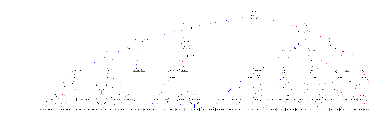

In [47]:
# Visulisation of single tree from xgboost model

import matplotlib.pyplot as plt

plot_tree(xgboost_model,num_trees=0)
plt.rcParams['figure.figsize'] = [400, 300]
plt.show()

<b> XGboost model evaluation using test variable returned by Training datatset via split method </b>

In [49]:
# Feature test variable 
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
27222,32,1,113838,15,10,2,10,0,4,1,0,0,99,38
13652,51,2,144084,11,9,4,6,3,4,0,0,0,40,38
30688,47,2,162494,15,10,0,11,4,4,0,0,0,45,38
25236,45,2,168598,2,8,2,0,5,2,0,3103,0,40,38
8504,49,2,128736,9,13,4,9,4,4,0,0,0,40,38


In [51]:
# Target test variable
y_test.head()

,wage_class
27222,0
13652,0
30688,1
25236,1
8504,0


In [62]:
# predict target variable form XGBoost model 

#apply feature set and model in to function predict_target_variable_prob_values()
print("Function-: predict_target_variable_prob_values() : ", predict_target_variable_prob_values.__doc__,"\n")

y_pred_new=predict_target_variable_prob_values(feature_variable=X_test , model=xgboost_model)
y_pred_test= y_pred_new[0]
y_pred_test_prob=y_pred_new[1]

print("Based upon test variable \n")
print("Predicted target variable (first 5 values):",y_pred_test[0:5])
print("Predicted target variable probabilities (first 5 values):\n", y_pred_test_prob[0:5])

Function-: predict_target_variable_prob_values() :  This function will return predicted target variable and its predicted probablities 

Based upon test variable 

Predicted target variable (first 5 values): [1 0 0 1 1]
Predicted target variable probabilities (first 5 values):
 [[2.1187222e-01 7.8812778e-01]
 [9.9925333e-01 7.4664131e-04]
 [9.9884474e-01 1.1552502e-03]
 [2.9724836e-04 9.9970275e-01]
 [4.7441006e-02 9.5255899e-01]]


In [63]:
# get Consfusion matrix and classification report for test variable 

# assign variable
actual_target_variable= y_test
predicted_target_variable= y_pred_test

print("Function-: get_confusion_matrix():" ,get_confusion_matrix.__doc__ )
print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")


print("Function-: get_classification_report():" ,get_classification_report.__doc__ )
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Function-: get_confusion_matrix(): This function will return Confusion matrix based upon actual and predicted target variable
Confusion matrix for training set :
 [[5995  797]
 [ 828 1422]] 

Function-: get_classification_report(): This function will return classification report based upon actual and predicted target variable
Classification report for training set :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6792
           1       0.64      0.63      0.64      2250

   micro avg       0.82      0.82      0.82      9042
   macro avg       0.76      0.76      0.76      9042
weighted avg       0.82      0.82      0.82      9042



In [70]:
# Evalutation score for test variable
print("Function-: get_model_eavluation_scores():",get_model_eavluation_scores.__doc__ )


# assign values 

actual_target_variable=y_test
predicted_target_variable=y_pred_test

# Apply fucntion to get evaluation scores
eval_test_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("For test variable")
print("Model Accuracy score  : %.2f%%" % (eval_test_scores[0]*100))
print("Model Precision score : %.2f%%" %  (eval_test_scores[1] *100))
print("Model Recall score  : %.2f%%" %  (eval_test_scores[2]*100))
print("Model F-1 score : %.2f%%" %  (eval_test_scores[3]*100))

Function-: get_model_eavluation_scores(): This function returns model acurracy score, precision score , recall score and F1-score
For test variable
Model Accuracy score  : 82.03%
Model Precision score : 64.08%
Model Recall score  : 63.20%
Model F-1 score : 63.64%


Based on above evaluation , we can predict  that out model is able to predcit 82.03% accourate prediction for person earning wage more than 50K or less tha-eqaul to 50K

<b> Model Evalution using Test dataset </b>

In [71]:
df_AdultData_test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0


In [72]:
# Shape of data
df_AdultData_test_set.shape

(15055, 15)

In [73]:
#Select Feature and target variable 

X_feature= df_AdultData_test_set.iloc[:,:-1]
y_target= df_AdultData_test_set.iloc[:,-1:]

In [74]:
#Sample of feature data
X_feature.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37


In [77]:
#Sample of target data
y_target.head(2)

,wage_class
0,0
1,0


In [78]:
# predict targte variable 

print("Function-: predict_target_variable_prob_values() : ", predict_target_variable_prob_values.__doc__,"\n")


y_target_predict = predict_target_variable_prob_values(feature_variable=X_feature , model=xgboost_model)
y_target_pred = y_target_predict[0]
y_target_pred_prob=y_target_predict[1]

print("Based upon test dataset \n")
print("Predicted target variable (first 5 values):",y_target_pred[0:5])
print("Predicted target variable probabilities (first 5 values):\n", y_target_pred_prob[0:5])

Function-: predict_target_variable_prob_values() :  This function will return predicted target variable and its predicted probablities 

Based upon test dataset 

Predicted target variable (first 5 values): [0 0 0 1 0]
Predicted target variable probabilities (first 5 values):
 [[9.9999988e-01 1.0274683e-07]
 [9.4339788e-01 5.6602091e-02]
 [9.7325265e-01 2.6747352e-02]
 [5.0067902e-06 9.9999499e-01]
 [1.0000000e+00 9.6886881e-09]]


In [79]:
# get confusion matix and classification report
# assign variable
actual_target_variable= y_target
predicted_target_variable= y_target_pred

print("Function-: get_confusion_matrix():" ,get_confusion_matrix.__doc__ )
print("Confusion matrix for training set :\n",get_confusion_matrix(actual_target_variable,predicted_target_variable), "\n")


print("Function-: get_classification_report():" ,get_classification_report.__doc__ )
print("Classification report for training set :\n",get_classification_report(actual_target_variable,predicted_target_variable))

Function-: get_confusion_matrix(): This function will return Confusion matrix based upon actual and predicted target variable
Confusion matrix for training set :
 [[10341  1014]
 [ 1585  2115]] 

Function-: get_classification_report(): This function will return classification report based upon actual and predicted target variable
Classification report for training set :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     11355
           1       0.68      0.57      0.62      3700

   micro avg       0.83      0.83      0.83     15055
   macro avg       0.77      0.74      0.75     15055
weighted avg       0.82      0.83      0.82     15055



In [80]:
# Evaluation score for Test Dataset

print("Function-: get_model_eavluation_scores():",get_model_eavluation_scores.__doc__ )


# assign values 

actual_target_variable=y_target
predicted_target_variable=y_target_pred

# Apply fucntion to get evaluation scores
eval_test_scores=get_model_eavluation_scores(actual_target_variable , predicted_target_variable)
print("For test variable")
print("Model Accuracy score  : %.2f%%" % (eval_test_scores[0]*100))
print("Model Precision score : %.2f%%" %  (eval_test_scores[1] *100))
print("Model Recall score  : %.2f%%" %  (eval_test_scores[2]*100))
print("Model F-1 score : %.2f%%" %  (eval_test_scores[3]*100))

Function-: get_model_eavluation_scores(): This function returns model acurracy score, precision score , recall score and F1-score
For test variable
Model Accuracy score  : 82.74%
Model Precision score : 67.59%
Model Recall score  : 57.16%
Model F-1 score : 61.94%


##### <b>Cross Validation Score </b>

In [82]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

In [85]:
scores = cross_val_score(estimator= xgboost_model,     # Model to test
                X= X_feature,  
                y = np.ravel(y_target),      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.8313413  0.80942895 0.8313413  0.82536521 0.81606906 0.82325581
 0.81993355 0.82923588 0.82923588 0.79734219]
Average accuracy:  0.8212549138992203


Thus after corss validation test, which result average accuracy of XGBoost model is 82% , which is eqaul to model accuarcy of test set of training dataset

Prevoiusly we have identified that ( based upon baseline accuarcy) 75.4% people earning wage less than - equal to 50K , rest 24.6% people earning wage more than 50K.

In [92]:
#Predict wage based upon predicted target variable of test dataset
df_wage=pd.DataFrame(y_target_pred, columns=['wage_class'])
df_wage.wage_class.value_counts(normalize=True)

0   0.792
1   0.208
Name: wage_class, dtype: float64

Thus based upon predtion 79.2% people were earning wage less than-equal to 50K and rest 20.8% were earning wage more than 50K.